<a href="https://colab.research.google.com/github/tangpnm/AI_CountingCoin/blob/master/Panumas_60130500237_multiclass_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Check the GPU**

In [23]:
#GPU count and name
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-e70fece6-ac4f-79b2-647d-c95ef37776bf)


In [24]:
#use this command to see GPU activity while doing Deep Learning tasks, for this command 'nvidia-smi' and for above one to work, go to 'Runtime > change runtime type > Hardware Accelerator > GPU'
!nvidia-smi

Mon Sep 28 03:06:47 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    32W / 250W |    683MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## ** 4. Keras MLP (MNIST)** 

In [25]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [26]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
<class 'numpy.float64'> <class 'numpy.uint8'>
5


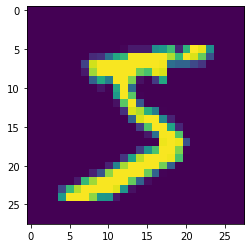

In [27]:
print(x_train.shape, y_train.shape, x_test.shape,y_test.shape)
print(type(x_train[0,0,0]), type(y_train[0]))
plt.imshow(x_train[0,:,:])
print(y_train[0])

In [28]:
model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(128, activation='relu'),
  Dropout(0.2),
  Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
model.fit(x_train, y_train, epochs=20)

model.evaluate(x_test, y_test)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2893 - accuracy: 0.9147
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1421 - accuracy: 0.9571
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1074 - accuracy: 0.9671
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0887 - accuracy: 0.9725
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0730 - accuracy: 0.9773
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0641 - accuracy: 0.9788
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0575 - accuracy: 0.9812
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0515 - accuracy: 0.9833
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0478 - accuracy: 0.9840
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.042

[0.08238927274942398, 0.9803000092506409]


# **5. Keras CNN (MNIST) **

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
#
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [31]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape, y_train.shape, x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [32]:
# reshape data to fit model
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
# one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(x_train.shape, y_train.shape, x_test.shape,y_test.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


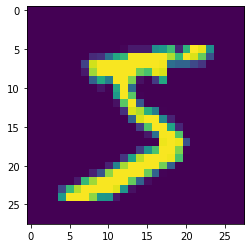

In [33]:
print(type(x_train), type(y_train))
plt.imshow(np.reshape(x_train[0,],(28,28)))
print(y_train[0])

In [34]:
model = Sequential([
  Conv2D(64, kernel_size=10, activation='relu', input_shape=(28, 28, 1)),
  Conv2D(32, kernel_size=10, activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Flatten(),
  Dense(128, activation='relu'),
  Dropout(0.2),
  Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 19, 19, 64)        6464      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 32)        204832    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               102528    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [35]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1501 - accuracy: 0.9533 - val_loss: 0.0452 - val_accuracy: 0.9858
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0543 - accuracy: 0.9838 - val_loss: 0.0369 - val_accuracy: 0.9891
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0404 - accuracy: 0.9881 - val_loss: 0.0448 - val_accuracy: 0.9858


In [36]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0448 - accuracy: 0.9858


[0.04476703330874443, 0.98580002784729]